# DATA 606 Capstone Project

## Part 1: Bail Status Prediction

**Author:** Snigdha Panakanti

**Term:** Summer 2023

Importing required libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

Loading the dataset:

In [2]:
df = pd.read_csv('/content/PretrialReleaseDataExtractWeb.csv')

In [3]:
df.head()

,Internal_Case_ID,Gender,Race,Ethnicity,Age_at_Crime,Age_at_Arrest,Court_Name,Court_ORI,County_Name,District,...,prior_misd_cnt,pend_vfo,pend_nonvfo,pend_misd,supervision,rearrest,rearrest_date,rearrest_firearm,rearrest_date_firearm,arr_cycle_id
0,0x866BC1A9D02C2D5D8C5E012A1263CBCB186AAD4EC432...,Female,White,Unknown,32.0,0.0,Queens Criminal Court,NY040033J,Queens,District 11,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,NaN
1,0x19CE12EEBB600591525A623342A703545C8217AECBED...,Male,Black,Non Hispanic,38.0,38.0,New York Criminal Court,NY030033J,New York,District 1,...,0.0,0.0,0.0,0.0,0.0,No Arrest,NaN,0.0,NaN,325544.0
2,0xF7CC1FA4C28B406C23DB333B96623EE4B85C447CA524...,Male,Unknown,Unknown,31.0,31.0,Syracuse City Court,NY033011J,Onondaga,District 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0x6D65E9BD03FE9F08760481FD325804F8F74FF2C874E1...,Unknown,Unknown,Unknown,28.0,28.0,Rome City Court,NY032011J,Oneida,District 5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0xB9F29E48ABC1069053C191061BB6B3B0792DBCD96FD1...,Male,White,Non Hispanic,36.0,36.0,New York Criminal Court,NY030033J,New York,District 1,...,10.0,0.0,1.0,1.0,0.0,Misdemeanor,1/1/2020,0.0,NaN,355075.0


In [4]:
df.columns

Index(['Internal_Case_ID', 'Gender', 'Race', 'Ethnicity', 'Age_at_Crime',
       'Age_at_Arrest', 'Court_Name', 'Court_ORI', 'County_Name', 'District',
       ...
       'prior_misd_cnt', 'pend_vfo', 'pend_nonvfo', 'pend_misd', 'supervision',
       'rearrest', 'rearrest_date', 'rearrest_firearm',
       'rearrest_date_firearm', 'arr_cycle_id'],
      dtype='object', length=108)

In [5]:
req_column = ['Gender', 'Age_at_Crime', 'Race','Ethnicity','Offense_Date', 'Arraign Charge Category', 'Representation_Type','Release Decision at Arraign','County_Name']

In [6]:
bail_status = df.filter(req_column)

In [7]:
bail_status.head()

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,County_Name
0,Female,32.0,White,Unknown,NaN,Criminal Contempt,Legal Aid,ROR,Queens
1,Male,38.0,Black,Non Hispanic,11/1/2019,Assault,Public Defender,ROR,New York
2,Male,31.0,Unknown,Unknown,4/1/2017,Unlicensed Operation,18B (Assigned Counsel),ROR,Onondaga
3,Unknown,28.0,Unknown,Unknown,4/1/2017,Unlicensed Operation,Public Defender,Disposed at arraign,Oneida
4,Male,36.0,White,Non Hispanic,1/1/2020,Larceny,Legal Aid,Nonmonetary release,New York


In [8]:
bail_status.isnull().sum()

Gender                             2
Age_at_Crime                       2
Race                               2
Ethnicity                          2
Offense_Date                    1409
Arraign Charge Category            2
Representation_Type            16814
Release Decision at Arraign        2
County_Name                        2
dtype: int64

In [9]:
bail_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284098 entries, 0 to 284097
Data columns (total 9 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Gender                       284096 non-null  object 
 1   Age_at_Crime                 284096 non-null  float64
 2   Race                         284096 non-null  object 
 3   Ethnicity                    284096 non-null  object 
 4   Offense_Date                 282689 non-null  object 
 5   Arraign Charge Category      284096 non-null  object 
 6   Representation_Type          267284 non-null  object 
 7   Release Decision at Arraign  284096 non-null  object 
 8   County_Name                  284096 non-null  object 
dtypes: float64(1), object(8)
memory usage: 19.5+ MB


In [10]:
bail_status['Offense_Date']= pd.to_datetime(bail_status['Offense_Date'])
bail_status['Offense_Date'].replace(np.nan, bail_status['Offense_Date'].mode().iloc[0],inplace=True)

In [11]:
bail_status['Age_at_Crime'].fillna(int(bail_status['Age_at_Crime'].mode()), inplace=True)

In [12]:
bail_status['Representation_Type'].fillna(bail_status['Representation_Type'].mode().iloc[0], inplace=True)

In [13]:
bail_status = bail_status.dropna()

In [14]:
bail_status.isnull().sum()

Gender                         0
Age_at_Crime                   0
Race                           0
Ethnicity                      0
Offense_Date                   0
Arraign Charge Category        0
Representation_Type            0
Release Decision at Arraign    0
County_Name                    0
dtype: int64

Converting the categorical values to numerical data based on each column as it will be needed to provide inputs to Machine Learning models.

In [15]:
bail_status.loc[bail_status['Age_at_Crime'] <= 20, 'age_group'] = 0
bail_status.loc[bail_status['Age_at_Crime'].between(21,35), 'age_group'] = 1
bail_status.loc[bail_status['Age_at_Crime'].between(36,50), 'age_group'] = 2
bail_status.loc[bail_status['Age_at_Crime'] >= 50, 'age_group'] = 3

In [16]:
bail_status['offense_year'] = pd.to_datetime(bail_status['Offense_Date']).dt.strftime('%Y')

In [17]:
bail_status['offense_year'] = bail_status['offense_year'].astype(float)

In [18]:
bail_status.loc[bail_status['offense_year'] <= 2010, 'offense_timeperiod'] = '0'
bail_status.loc[bail_status['offense_year'].between(2010,2019), 'offense_timeperiod'] = '1'
bail_status.loc[bail_status['offense_year'] == 2020, 'offense_timeperiod'] = '3'
bail_status.loc[bail_status['offense_year'] > 2020, 'offense_timeperiod'] = '4'

In [19]:
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Bail-set', 'Bail_status'] = 1
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Disposed at arraign', 'Bail_status'] = 0
bail_status.loc[bail_status['Release Decision at Arraign'] == 'ROR', 'Bail_status'] = 1
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Nonmonetary release', 'Bail_status'] = 0
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Remanded', 'Bail_status'] = 0
bail_status.loc[bail_status['Release Decision at Arraign'] == 'Unknown', 'Bail_status'] = 0

In [20]:
bail_status.head()

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,County_Name,age_group,offense_year,offense_timeperiod,Bail_status
0,Female,32.0,White,Unknown,2020-01-01,Criminal Contempt,Legal Aid,ROR,Queens,1.0,2020.0,3,1.0
1,Male,38.0,Black,Non Hispanic,2019-11-01,Assault,Public Defender,ROR,New York,2.0,2019.0,1,1.0
2,Male,31.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,18B (Assigned Counsel),ROR,Onondaga,1.0,2017.0,1,1.0
3,Unknown,28.0,Unknown,Unknown,2017-04-01,Unlicensed Operation,Public Defender,Disposed at arraign,Oneida,1.0,2017.0,1,0.0
4,Male,36.0,White,Non Hispanic,2020-01-01,Larceny,Legal Aid,Nonmonetary release,New York,2.0,2020.0,3,0.0


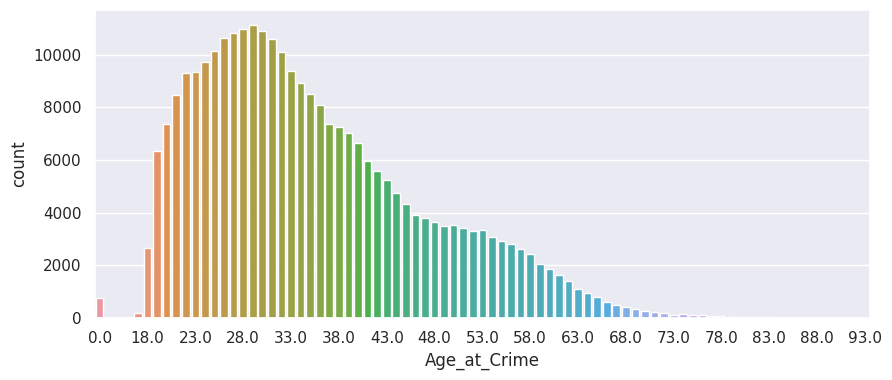

In [21]:
# Visualizing the age distribution at crime
sns.set_theme(style="darkgrid")
plt.figure(figsize=(10,4))
ax = sns.countplot(x="Age_at_Crime", data=bail_status)
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

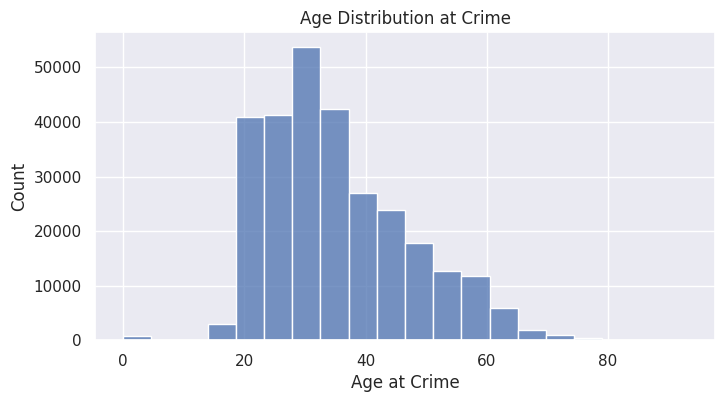

In [22]:
plt.figure(figsize=(8,4))
sns.histplot(data=bail_status, x='Age_at_Crime', bins=20)
plt.xlabel('Age at Crime')
plt.ylabel('Count')
plt.title('Age Distribution at Crime')
plt.show()

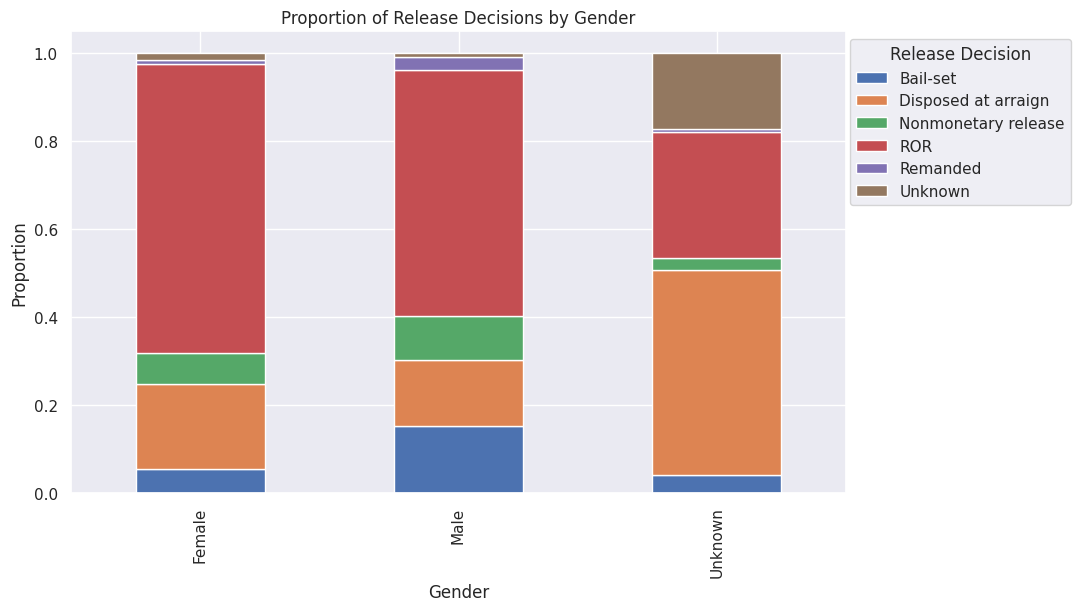

In [23]:
# Creating a stacked bar plot to compare the counts of release decisions at arraign based on gender and race
cross_table = pd.crosstab(bail_status['Gender'], bail_status['Release Decision at Arraign'], normalize='index')
cross_table.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Gender')
plt.ylabel('Proportion')
plt.title('Proportion of Release Decisions by Gender')
plt.legend(title='Release Decision', bbox_to_anchor=(1.3, 1), loc='upper right')
plt.show()

Used Encoding to convert Categorical to Numerical Values

In [24]:
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder
use_col = ['Gender','Race','Ethnicity', 'Age_at_Crime','Arraign Charge Category', 'offense_timeperiod','Representation_Type','County_Name']

enc = LeaveOneOutEncoder(cols = ['Gender','Race','Ethnicity', 'Age_at_Crime','Arraign Charge Category', 'offense_timeperiod','Representation_Type','County_Name'])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.6 MB/s eta 0:00:00


In [25]:
labels = bail_status['Bail_status'].copy()
final_bail_status = enc.fit_transform(bail_status,labels)

In [26]:
final_bail_status.head()

,Gender,Age_at_Crime,Race,Ethnicity,Offense_Date,Arraign Charge Category,Representation_Type,Release Decision at Arraign,County_Name,age_group,offense_year,offense_timeperiod,Bail_status
0,0.711921,0.723255,0.735374,0.616387,2020-01-01,0.729436,0.680847,ROR,0.761671,1.0,2020.0,0.720971,1.0
1,0.712475,0.715505,0.730907,0.728691,2019-11-01,0.845037,0.715048,ROR,0.683107,2.0,2019.0,0.629621,1.0
2,0.712475,0.717453,0.634109,0.616387,2017-04-01,0.563324,0.730284,ROR,0.696621,1.0,2017.0,0.629621,1.0
3,0.328316,0.723993,0.634125,0.616404,2017-04-01,0.563357,0.715060,Disposed at arraign,0.657394,1.0,2017.0,0.629654,0.0
4,0.712479,0.712733,0.735384,0.728697,2020-01-01,0.655735,0.680857,Nonmonetary release,0.683138,2.0,2020.0,0.720977,0.0


In [27]:
final_bail_status = final_bail_status.drop(columns = ['Offense_Date','age_group','offense_year','Release Decision at Arraign'])

In [28]:
final_bail_status.head()

,Gender,Age_at_Crime,Race,Ethnicity,Arraign Charge Category,Representation_Type,County_Name,offense_timeperiod,Bail_status
0,0.711921,0.723255,0.735374,0.616387,0.729436,0.680847,0.761671,0.720971,1.0
1,0.712475,0.715505,0.730907,0.728691,0.845037,0.715048,0.683107,0.629621,1.0
2,0.712475,0.717453,0.634109,0.616387,0.563324,0.730284,0.696621,0.629621,1.0
3,0.328316,0.723993,0.634125,0.616404,0.563357,0.715060,0.657394,0.629654,0.0
4,0.712479,0.712733,0.735384,0.728697,0.655735,0.680857,0.683138,0.720977,0.0


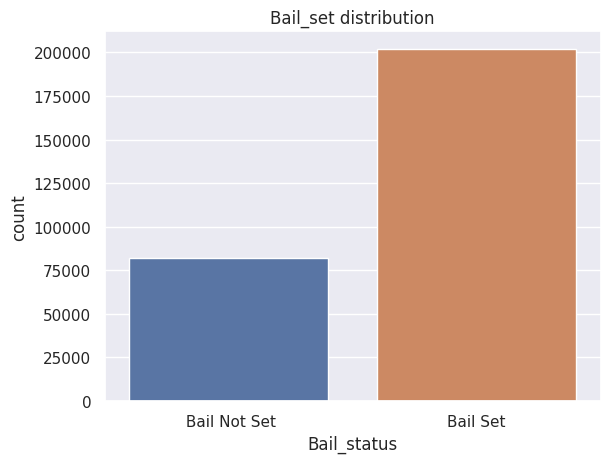

In [29]:
sns.countplot(x='Bail_status',data = final_bail_status)
plt.title('Bail_set distribution')
position = (1,0)
labels = ("Bail Set", " Bail Not Set")
plt.xticks(position,labels)
plt.show()

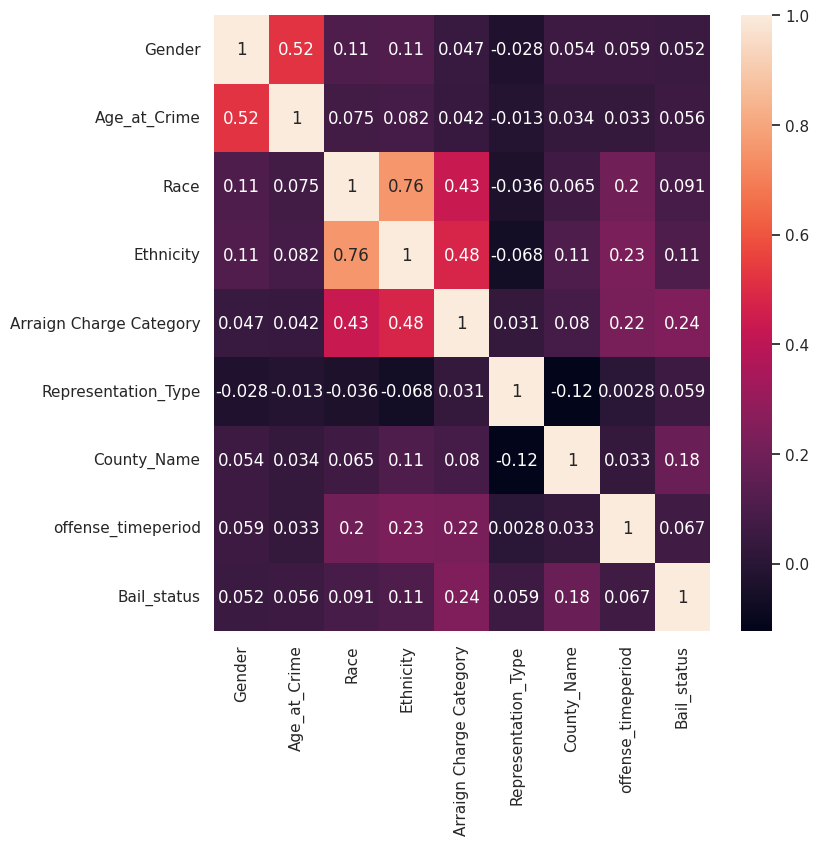

In [30]:
#Heatmap of the correlation of features
plt.figure(figsize=(8,8))
sns.heatmap(final_bail_status.corr(), annot=True);

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC

In [32]:
#Normalizing the final data to test and train in models
scaler = MinMaxScaler(feature_range = (0,1))
normalized_data = scaler.fit_transform(final_bail_status)
columns = ['Gender', 'Race', 'Ethnicity', 'Arraign Charge Category','Representation_Type', 'age_group', 'offense_timeperiod','County_Name','Bail_status']
normalized_df = pd.DataFrame(normalized_data, columns=columns)
normalized_df.head()

,Gender,Race,Ethnicity,Arraign Charge Category,Representation_Type,age_group,offense_timeperiod,County_Name,Bail_status
0,0.998549,0.723255,0.876771,0.000000,0.731797,0.361693,0.673252,0.999116,1.0
1,0.999988,0.715505,0.838098,0.813469,0.998815,0.430096,0.494913,0.695540,1.0
2,0.999988,0.717453,0.000000,0.000000,0.348107,0.460568,0.525589,0.695540,1.0
3,0.002443,0.723993,0.000137,0.000124,0.348182,0.430121,0.436545,0.695650,0.0
4,1.000000,0.712733,0.876857,0.813513,0.561560,0.361713,0.494983,0.999134,0.0


In [33]:
#Split Test and Train data as 30% and 70% respectively
X = normalized_df.iloc[:, :-1]
Y = normalized_df.iloc[:, -1]
#test  = normalized_df.iloc[56818:, -1]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 2)

In [34]:
X_train.shape, Y_train.shape
X_test.shape,Y_test.shape

((85229, 8), (85229,))

Baseline Model

In [35]:
from sklearn.dummy import DummyClassifier

baseline = DummyClassifier(strategy='most_frequent')
baseline.fit(X_train,Y_train)

Y_predct_base = baseline.predict(X_test)

baseline_acc = metrics.accuracy_score(Y_test,Y_predct_base)
print("Baseline Accuracy: ", baseline_acc)

Baseline Accuracy:  0.7111898532189748


Logistic Regression Model

In [36]:
log_reg = LogisticRegression()
log_reg.fit(X_train,Y_train)
Y_predct_log = log_reg.predict(X_test)

log_reg_acc = metrics.accuracy_score(Y_test, Y_predct_log)
log_reg_f1 = metrics.f1_score(Y_test, Y_predct_log)
log_reg_prec = metrics.precision_score(Y_test, Y_predct_log)
log_reg_recall =metrics.recall_score(Y_test, Y_predct_log)

print("Accuracy:",log_reg_acc)
print("F1 Score:",log_reg_f1)
print("Precision:",log_reg_prec)
print("Recall:",log_reg_recall)

Accuracy: 0.7248706426216429
F1 Score: 0.8303783916726344
Precision: 0.7393757487536874
Recall: 0.9469264526347049


In [37]:
y_pred_log_prob = log_reg.predict_proba(X_test)[::,1]
fpr_log, tpr_log, _ = metrics.roc_curve(Y_test, y_pred_log_prob)
auc_log = metrics.roc_auc_score(Y_test, y_pred_log_prob)

In [38]:
#Confusion Matrix for Logistic Regression Model
conf_matrix = confusion_matrix(Y_test, Y_predct_log)
print(conf_matrix)

[[ 4383 20232]
 [ 3217 57397]]


Gaussian Naive Bayes Model

In [39]:
nb = GaussianNB()
nb.fit(X_train,Y_train)

Y_predct_nb = nb.predict(X_test)

nb_acc = metrics.accuracy_score(Y_test, Y_predct_nb)
nb_f1 = metrics.f1_score(Y_test, Y_predct_nb)
nb_prec = metrics.precision_score(Y_test, Y_predct_nb)
nb_recall = metrics.recall_score(Y_test, Y_predct_nb)
print("Accuracy:",nb_acc)
print("F1 Score:",nb_f1)
print("Precision:",nb_prec)
print("Recall:",nb_recall)

Accuracy: 0.7103333372443652
F1 Score: 0.8216339623732046
Precision: 0.730892825008355
Recall: 0.9381001088857359


In [40]:
y_pred_nb_prob = log_reg.predict_proba(X_test)[::,1]
fpr_nb, tpr_nb, _ = metrics.roc_curve(Y_test, y_pred_nb_prob)
auc_nb = metrics.roc_auc_score(Y_test, y_pred_nb_prob)

In [41]:
#Confusion Matrix for Logistic Regression Model
conf_matrix = confusion_matrix(Y_test, Y_predct_nb)
print(conf_matrix)

[[ 3679 20936]
 [ 3752 56862]]


k-Nearest Neighbors (KNN) Classifier Model

In [42]:
knn = KNeighborsClassifier(n_neighbors=7)

In [43]:
knn.fit(X_train,Y_train)
Y_predct_knn = knn.predict(X_test)

In [44]:
knn_acc = metrics.accuracy_score(Y_test, Y_predct_knn)
knn_f1 = metrics.f1_score(Y_test, Y_predct_knn)
knn_prec = metrics.precision_score(Y_test, Y_predct_knn)
knn_recall = metrics.recall_score(Y_test, Y_predct_knn)
print("Accuracy:", knn_acc)
print("F1 Score:",knn_f1)
print("Precision:",knn_prec)
print("Recall:",knn_recall)

Accuracy: 0.7668633915685975
F1 Score: 0.8457274181276107
Precision: 0.7987797723806171
Recall: 0.8985382914838156


In [45]:
y_pred_knn_prob = knn.predict_proba(X_test)[::,1]
fpr_knn, tpr_knn, _ = metrics.roc_curve(Y_test,y_pred_knn_prob)
auc_knn = metrics.roc_auc_score(Y_test, y_pred_knn_prob)

In [46]:
conf_matrix = confusion_matrix(Y_test, Y_predct_knn)
print(conf_matrix)

[[10895 13720]
 [ 6150 54464]]


Plotting Graph for Model results

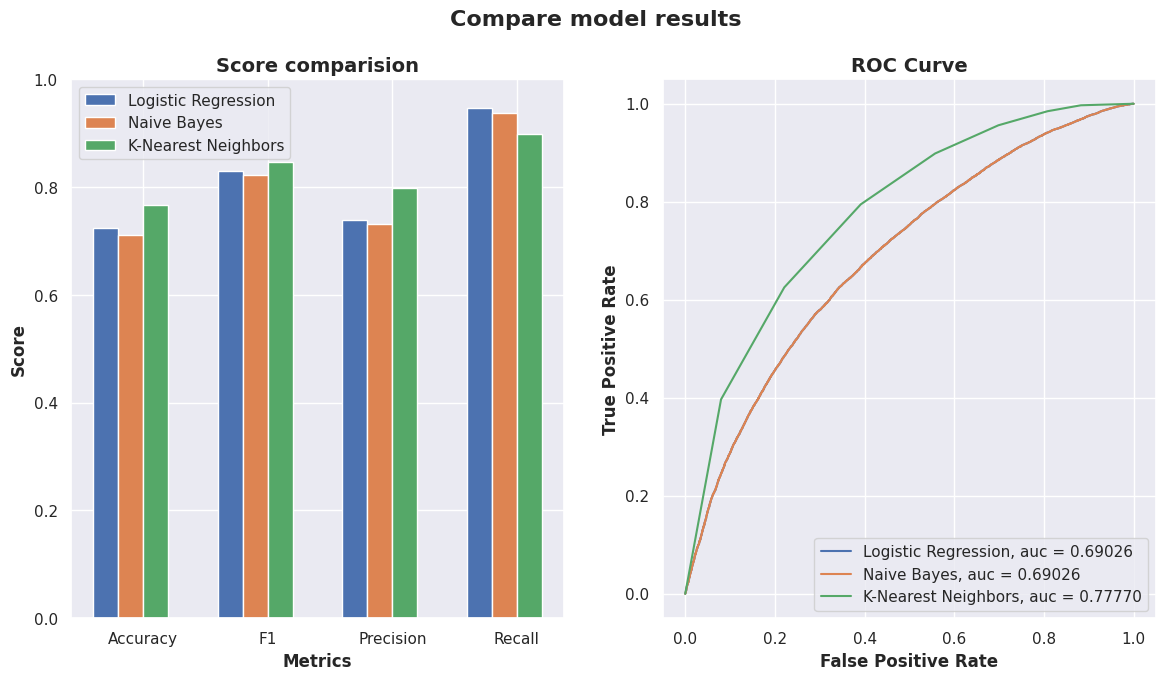

In [47]:
#https://stackoverflow.com/questions/53182452/python-create-bar-chart-comparing-2-sets-of-data
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Compare model results', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

barsize = 0.2
log_reg_score = [log_reg_acc,log_reg_f1,log_reg_prec,log_reg_recall]
nb_score = [nb_acc,nb_f1,nb_prec,nb_recall]
knn_score = [knn_acc,knn_f1,knn_prec,knn_recall]

a1 = np.arange(len(log_reg_score))
a2 = [x + barsize for x in a1]
a3 = [x + barsize for x in a2]

ax1.bar(a1, log_reg_score, width=barsize, edgecolor='white', label='Logistic Regression')
ax1.bar(a2, nb_score, width=barsize, edgecolor='white', label='Naive Bayes')
ax1.bar(a3, knn_score, width=barsize, edgecolor='white', label='K-Nearest Neighbors')


ax1.set_xlabel('Metrics', fontweight='bold')
labels = ['Accuracy', 'F1', 'Precision', 'Recall']
ax1.set_xticks([r + (barsize * 1.5) for r in range(len(log_reg_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Score', fontweight='bold')
ax1.set_ylim(0, 1)

ax1.set_title('Score comparision', fontsize=14, fontweight='bold')
ax1.legend()

ax2.plot(fpr_log, tpr_log, label='Logistic Regression, auc = {:0.5f}'.format(auc_log))
ax2.plot(fpr_nb, tpr_nb, label='Naive Bayes, auc = {:0.5f}'.format(auc_nb))
ax2.plot(fpr_knn, tpr_knn, label='K-Nearest Neighbors, auc = {:0.5f}'.format(auc_knn))

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')


ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.show()


Modifying the K-value in KNN algorithm

In [48]:
knn1 = KNeighborsClassifier(n_neighbors=5)

knn1.fit(X_train,Y_train)
Y_predct_knn1 = knn1.predict(X_test)

In [49]:
knn1_acc = metrics.accuracy_score(Y_test, Y_predct_knn1)
knn1_f1 = metrics.f1_score(Y_test, Y_predct_knn1)
knn1_prec = metrics.precision_score(Y_test, Y_predct_knn1)
knn1_recall = metrics.recall_score(Y_test, Y_predct_knn1)
print("Accuracy:", knn1_acc)
print("F1 Score:",knn1_f1)
print("Precision:",knn1_prec)
print("Recall:",knn1_recall)

Accuracy: 0.7736451207922186
F1 Score: 0.8486474612439592
Precision: 0.8090650710545999
Recall: 0.8923021084237965


Split the Dataset as 20% and 80% for test and train respectively

In [50]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [51]:
knn3 = KNeighborsClassifier(n_neighbors=3,weights="distance")
knn3.fit(X_train2,Y_train2)
Y_predct_knn3 = knn3.predict(X_test2)

In [52]:
knn3_acc = metrics.accuracy_score(Y_test2, Y_predct_knn3)
knn3_f1 = metrics.f1_score(Y_test2, Y_predct_knn3)
knn3_prec = metrics.precision_score(Y_test2, Y_predct_knn3)
knn3_recall = metrics.recall_score(Y_test2, Y_predct_knn3)
print("Accuracy:", knn3_acc)
print("F1 Score:",knn3_f1)
print("Precision:",knn3_prec)
print("Recall:",knn3_recall)

Accuracy: 0.8284582893347413
F1 Score: 0.8819761457891868
Precision: 0.8635210432720806
Recall: 0.9012373174956694
